In [1]:
import pandas as pd

In [2]:
df_f = pd.read_csv("AAC.csv",header=None)
df_l = pd.read_csv("solubility2.csv")

In [3]:
df_f

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,aaeX,0.044776,0.029851,0.014925,0.014925,0.149254,0.029851,0.014925,0.074627,0.000000,...,0.014925,0.014925,0.074627,0.000000,0.044776,0.059701,0.029851,0.119403,0.029851,0.044776
1,aas,0.076495,0.005563,0.041725,0.062587,0.050070,0.076495,0.022253,0.054242,0.052851,...,0.031989,0.018081,0.057024,0.037552,0.070932,0.045897,0.061196,0.084840,0.011127,0.030598
2,aat,0.064103,0.025641,0.034188,0.072650,0.047009,0.089744,0.038462,0.042735,0.017094,...,0.034188,0.034188,0.064103,0.029915,0.085470,0.072650,0.025641,0.051282,0.029915,0.029915
3,abgA,0.151376,0.006881,0.048165,0.059633,0.045872,0.098624,0.043578,0.027523,0.016055,...,0.029817,0.027523,0.032110,0.059633,0.052752,0.052752,0.059633,0.084862,0.013761,0.016055
4,abgB,0.130977,0.018711,0.041580,0.062370,0.043659,0.076923,0.033264,0.045738,0.031185,...,0.018711,0.049896,0.043659,0.054054,0.039501,0.051975,0.079002,0.060291,0.016632,0.024948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,ytfG,0.171329,0.000000,0.052448,0.052448,0.017483,0.087413,0.027972,0.052448,0.048951,...,0.013986,0.031469,0.024476,0.041958,0.024476,0.080420,0.062937,0.062937,0.006993,0.031469
3144,ytfN,0.066720,0.003177,0.065925,0.054805,0.023828,0.090548,0.007149,0.050040,0.052423,...,0.020651,0.057983,0.051628,0.055600,0.040508,0.055600,0.064337,0.087371,0.016680,0.013503
3145,yzcX,0.047170,0.018868,0.113208,0.094340,0.047170,0.084906,0.028302,0.075472,0.028302,...,0.009434,0.037736,0.009434,0.066038,0.047170,0.047170,0.066038,0.028302,0.047170,0.009434
3146,yzfA,0.061947,0.000000,0.070796,0.035398,0.017699,0.115044,0.035398,0.044248,0.026549,...,0.026549,0.044248,0.035398,0.053097,0.070796,0.053097,0.044248,0.053097,0.026549,0.079646


In [4]:
feature = df_f.iloc[:,1:].values
label = df_l['Solubility...'].values
label

array([34,  7,  8, ..., 27, 88, 30], dtype=int64)

In [5]:
feature.shape

(3148, 20)

In [6]:

from __future__ import division
 
import time
 
import numpy as np
 
from sklearn.svm import SVR
 
from sklearn.model_selection import GridSearchCV
 
from sklearn.model_selection import learning_curve
 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [7]:
X_train,X_test,y_train,y_test = train_test_split(feature,label,test_size=0.3)

In [8]:
#初始化SVR

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
param_grid={"C": [1e0, 1e1, 1e2, 1e3],
"gamma": np.logspace(-2, 2, 5)})


In [9]:
svr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(gamma=0.1),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [10]:
y_pred = svr.predict(X_test)

In [11]:
from sklearn.manifold import TSNE

In [12]:
X_test.shape

(945, 20)

In [13]:
tsne = TSNE(random_state=105)
tsne.fit_transform(X_test)  # 进行数据降维

d:\Users\Binyun\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
d:\Users\Binyun\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ 18.805943 ,  -4.1871347],
       [-11.668819 ,   1.8333858],
       [  1.2781221,  -5.046891 ],
       ...,
       [-22.548721 ,   2.523084 ],
       [  5.7293386,   0.9297507],
       [  6.3138514,   8.377056 ]], dtype=float32)

In [14]:
lowDWeights = tsne.embedding_

In [15]:

from matplotlib import cm
def plot_with_labels(lowDWeights, label,pred):
    plt.cla()
    # 降到二维了，分别给x和y
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    z1 = label
    z2 = pred
    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(X, Y, z1)
    ax.legend()
    ax.set_xlim(min(X), max(X))
    ax.set_ylim(min(Y), max(Y))
    ax.set_zlim(min(z1), max(z1))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()


No handles with labels found to put in legend.


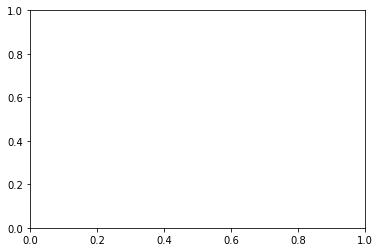

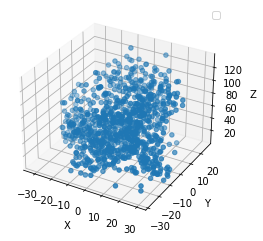

In [16]:
plot_with_labels(lowDWeights,y_test,y_pred)

In [17]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


0.39775826810936576


In [18]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

672.6412502814809


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))


25.93532822775684


In [20]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))


20.751056825374175


In [21]:
def regression_evaluation(true_value: np.ndarray, pred_value: np.ndarray) -> pd.DataFrame:
    """回归问题得到预测结果的指标
    :param true_value:真实值
    :param pred_value:预测值
    """
    from scipy.stats import spearmanr
    from scipy.stats import pearsonr
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    Rank_IC = spearmanr(true_value,pred_value).correlation
    Pearson = pearsonr(true_value,pred_value)[0]
    r2 = r2_score(true_value, pred_value)
    mae = mean_absolute_error(true_value, pred_value)
    rmse = np.sqrt(mean_squared_error(true_value, pred_value))
    mse = mean_squared_error(true_value, pred_value)
    smape = 100 / len(true_value) * np.sum(
        2 * np.abs(pred_value - true_value) / (np.abs(true_value) + np.abs(pred_value)))
    # MAPE指标
    # from sklearn.metrics import mean_absolute_percentage_error
    # mape = mean_absolute_percentage_error(true_value, pred_value)

    dataframe = pd.DataFrame([Rank_IC,Pearson,r2, mae, rmse, mse, smape]).T
    dataframe.columns = ["Rank_IC","Pearson",'r2', 'MAE', 'RMSE', 'MSE', "SMAPE"]
    return dataframe


In [27]:
regression_evaluation(y_test,y_pred)

,Rank_IC,Pearson,r2,MAE,RMSE,MSE,SMAPE
0,0.632069,0.636097,0.397758,20.751057,25.935328,672.64125,53.526969


In [23]:
from scipy.stats import pearsonr
pearsonr(y_train,train_pred)

(0.6947101466431657, 2.7167514e-317)

In [24]:
pearsonr([1,2,3,4],[0.9,1.8,2.7,4])

(0.9954180744075039, 0.00458192559249615)

In [25]:
import pickle
with open('./model/svr_soubility.pkl', 'wb') as f:
    pickle.dump(svr, f)


In [26]:
import pickle
with open('./model/svr_soubility.pkl', 'rb') as f:
    svr = pickle.load(f)
